In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Theory

 - Based on the type of relationship we want to setup, we have different tools.
 - C means Categorical, Q means Quantitative, C --> Q means we cant to know about Q from C.
 <table>
  <tr>
      <th> RelationShip </th>
      <th> Tool </th>
  </tr>
  <tr>
      <td> C --> C </td>
      <td> Contigency table, descriptive statistics</td>
  </tr>
  <tr>
      <td> C --> Q </td>
      <td> Box plots, histograms, five number summary</td>
  </tr>
  <tr>
      <td> Q --> C </td>
      <td> </td>
  </tr>
  <tr>
      <td> Q --> Q </td>
      <td> Scatter plot, correlation</td>
  </tr>
</table>

## Contigency table ( C --> C)

In this activity, we will use the collected data to:

 - learn how to build a two-way table and compute conditional percentages.
 - interpret the data in terms of the relationship between a young child's nighttime exposure to light and later nearsightedness.

In [4]:
df = pd.read_excel('./nightlight.xls')
df.head(2)

,Light,Nearsightedness
0,no light,No
1,night light,No


In [11]:
pd.crosstab(df['Light'], df['Nearsightedness'], rownames=['Light'], colnames=['Nearsightedness'], normalize='index')


Nearsightedness,No,Yes
Light,,
lamp,0.453333,0.546667
night light,0.659483,0.340517
no light,0.901163,0.098837


 - Kids with no exposure to light in their early days were safe.
 - Most of the kids with exposure towards the lamp suffered from Near Sighted ness.

## Scatter plot (Q --> Q)
What to observer in order to describe overall pattern:
 - direction - ex whether increase in x increases y or not. This suggest function will be an increasing or decreasing function.
 - form - to get some sense whether a function will be monotonically or exponentially increasing, we need to figure out `what sort of function it is`, whether its `linear`, or `logarithmic`.
 - strenth - now, idea is to check `how much observations are varying from function`.
 
 - outliers - observations showing exceptional behavior should be marked.
 

In [31]:
student_df = pd.read_excel('./height.xls')
student_df.head(2)

,gender,height,weight
0,0,72,155
1,0,67,145


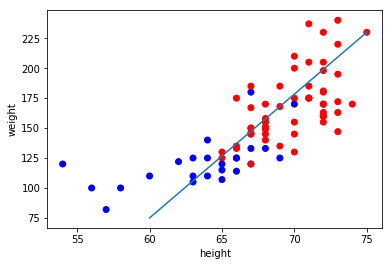

In [46]:
c = student_df['gender'].map(lambda x: 'red' if x == 0 else 'blue')
plt.scatter(student_df['height'], student_df['weight'], color=c)
plt.plot([60, 75], [75, 230]) # estimated function - just manually drawn 
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

**Interpretation**
- direction - height and weight seems to be positively related.
     - for boys - growth is more speedy
     - for girls - growth is less speedy
     
 - form - However for overall graph it seems to have polynomial curve
     - If we split the data in 2 segment, then we can generate two linear line, which should work well.
 - strength - there seems significant deviation within each group.
 
 - outlier - observation ~(53, 124) seems to a potential outlier.

### Co-relation

 - Corelation tells the strength. Correlation coefficient r is given as:

r = ${1 \over n-1}$$\sum_{i=1}^{n} {(x_i - \mu_x)\over S_x}{(y_i - \mu_y)\over S_y}$

 - **Note**: Correlation is only applicable to linear relationships.
 - Correlation ranges from -1 to 1.
 - Correlation = 0, means, points are totally scatter. They don't have any relationship.
 - High corelation value, doesn't ensure its a linear model.

#### Negative linear relationship as negative corelation.

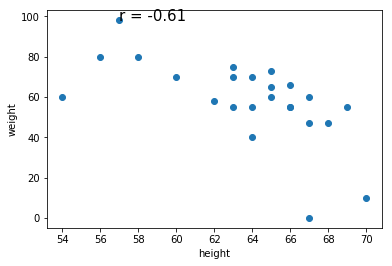

In [76]:
female_student = student_df[student_df['gender'] == 1]
# c = student_df['gender'].map(lambda x: 'red' if x == 0 else 'blue')
translated_weight = -female_student['weight'] + 180 # to depict negative relationship
corr = np.corrcoef(translated_weight, female_student['height'] )[0, 1]

plt.scatter(female_student['height'], translated_weight)
plt.text(female_student['height'].iloc[5], np.max(translated_weight), 'r = {0:.2f}'.format(corr), fontsize=15)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()



#### Positive linear relationship has positive corelation. 

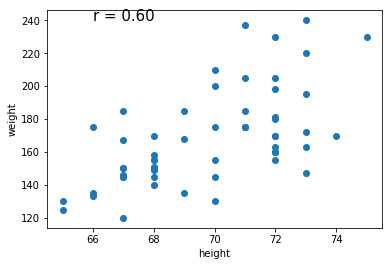

In [77]:
male_student = student_df[student_df['gender'] == 0]
# c = student_df['gender'].map(lambda x: 'red' if x == 0 else 'blue')
plt.scatter(male_student['height'], male_student['weight'])
# plt.plot([60, 75], [75, 230]) # estimated function - just manually drawn 
plt.xlabel('height')
plt.ylabel('weight')
corr = np.corrcoef(male_student['height'], male_student['weight'])[0, 1]
plt.text(male_student['height'].iloc[5], np.max(male_student['weight']), 'r = {0:.2f}'.format(corr), fontsize=15)

plt.show()



#### Corelation is meant for `linear` relationship only.

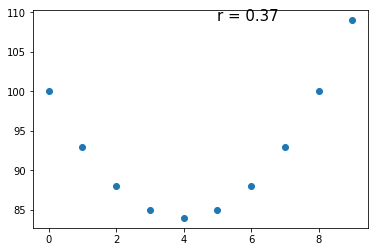

In [78]:
x = np.arange(0, 10)
y = x**2 +100 - 8*x
plt.scatter(x, y)
corr = np.corrcoef(x, y)[0, 1]
plt.text(x[5], np.max(y), 'r = {0:.2f}'.format(corr), fontsize=15)
plt.show()

#### Effect of outlier on corelation

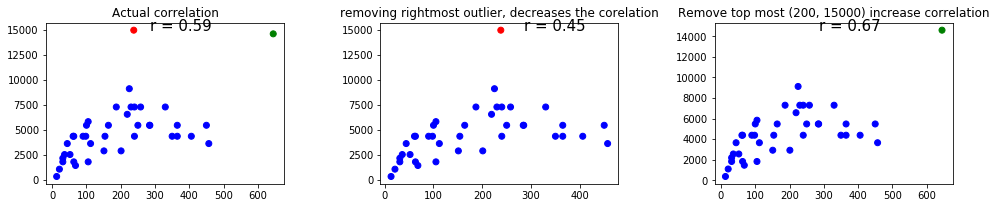

In [130]:
an_stat = pd.read_csv('./gestation_longetivity.csv', delimiter='\t')
an_stat['color'] = 'blue'
an_stat.loc[an_stat['Animal'] == 'Hippopotamus', 'color'] = 'red'
an_stat.loc[an_stat['Animal'] == 'Elephant', 'color'] = 'green'

plt.figure(figsize=(14, 8))

plt.subplot(331)
gest_days = an_stat['gestation']
long_days = an_stat['l_days']
c1 = an_stat['color']
corr1 = np.corrcoef(gest_days, long_days)[0, 1]
plt.title('Actual correlation')
plt.text(gest_days.iloc[5], np.max(long_days), 'r = {0:.2f}'.format(corr1), fontsize=15)
plt.scatter(gest_days, long_days, color = c1)

plt.subplot(332)
an_stat_wo_outlier = an_stat[an_stat['gestation'] < 500]
c2 = an_stat_wo_outlier['color']
gest_days_wo_out = an_stat_wo_outlier['gestation']
long_days_wo_out = an_stat_wo_outlier['l_days']
corr2 = np.corrcoef(gest_days_wo_out, long_days_wo_out)[0, 1]
plt.title('removing rightmost outlier, decreases the corelation')
plt.text(gest_days_wo_out.iloc[5], np.max(long_days_wo_out), 'r = {0:.2f}'.format(corr2), fontsize=15)
plt.scatter(gest_days_wo_out, long_days_wo_out, color=c2)


plt.subplot(333)
an_stat_wo_outlier_1 = an_stat[(an_stat['l_days'] < 14965) ]
c3 = an_stat_wo_outlier_1['color']

gest_days_wo_out_1 = an_stat_wo_outlier_1['gestation']
long_days_wo_out_1 = an_stat_wo_outlier_1['l_days']
corr3 = np.corrcoef(gest_days_wo_out_1, long_days_wo_out_1)[0, 1]
plt.title('Remove top most (200, 15000) increase correlation')
plt.text(gest_days_wo_out_1.iloc[5], np.max(long_days_wo_out_1), 'r = {0:.2f}'.format(corr3), fontsize=15)
plt.scatter(gest_days_wo_out_1, long_days_wo_out_1, color=c3)

plt.tight_layout()
plt.show()

 - figure 2, on removing green point, reduces the corelation because 
     - despite green point was outlier, but it was following the pattern. Therefore it was adding significant information to the pattern. So on reducing it, we lost bit of information and reduce corelation
 - figure 3, on removing red point, increases the corelation because,
     - red point was sort of out of the league, and it was not adding much information to the pattern. So, it was outlier in real sense.
     
 - **Bottom Line**
     - We need to read the impact of "out of the league" point, befor marking/treating them as outlier.